# KEN1435 - Principles of Data Science | Lab 2: Histogram, Average, and Standard Deviation

First we load the necessary python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from palmerpenguins import load_penguins
import watermark

%matplotlib inline
%load_ext watermark
%watermark -iv

seaborn   : 0.13.1
watermark : 2.4.3
matplotlib: 3.8.2
pandas    : 2.1.4
numpy     : 1.26.3



Our first step is to load the data using the `load_penguins` function and remove all the `NaN`-values from the dataframe. The resulting data frame is stored in the variable `df`.

In [2]:
penguins = load_penguins()
penguins.head()

ma = ~(penguins.isna().sum(axis=1) > 0)
df = penguins.loc[ma, :].copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## The `map`-function
In the previous lab, we mapped all values of a categorical column to another value using the `apply`-function as an example of how the apply function works. However, there is an easier way to map categorical values, using the `map` function (see the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas.Series.map)). Note that we can also use the `map` function on a `DataFrame`, which replaces values throughout the entire data frame (see the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html#pandas-dataframe-map)).

In [3]:
df["sex"].map({"male": 1})

0      1.0
1      NaN
2      NaN
4      NaN
5      1.0
      ... 
339    1.0
340    NaN
341    1.0
342    1.0
343    NaN
Name: sex, Length: 333, dtype: float64

Note that all values that are not contained in the dictionary receive a `NaN`-value as output.

## The `cut`-function

Another `pandas`-function that we should discuss is called `cut`, see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.cut.html). This function allows you to cut a continuous variable up into predetermined bins. As an example, let's revisit the histogram that we created during the lecture. Here, we looked at the `body_mass_g` propoerty of the penguins and binned that in 18 bins, which is equivalent to bins spanning 200 grams. We will store the bin edges in the variable `edges`.

In [4]:
edges = np.arange(2700, 6301, 200)

Another option of the function `cut` is to provide labels for all the categories. As we are binning data here, we will label the bins with the intervals that we use for the binnen. We build the labels using a **list comprehension**, in which we build an array by looping over the items in a collection and performing some function over them.

In [5]:
bin_labels = ["[{}-{})".format(v, v+200) for v in edges[:-1]]

Finally, we pass `right=False`, to ensure that we include the left boundary for each interval rather than the right boundary.

In [6]:
df["body_mass_bin"] = pd.cut(df["body_mass_g"], bins=edges, labels=bin_labels, right=False)

## The `concat`-function

Finally, with the `concat`-function, we can combine several data frames into a single data frame. Let's start by an example with the grade data that we also used during the previous lab.

First, we load the grades data.

In [7]:
grades = pd.read_csv("CurrentGrades2.csv", index_col="StudentID", sep=";", na_values="NG")
grades.head()

,MTE-004,LOE-103,DSE-005,JTE-234,JHF-101,LDE-009,BKO-800,ATE-214,FEA-907,TGL-013,...,GHL-823,WDM-974,TSO-010,PPL-239,DSE-003,LPG-307,PLO-132,ATE-014,KMO-007,ATE-008
StudentID,,,,,,,,,,,,,,,,,,,,,
1000457,7.0,8.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1000543,7.0,7.0,NaN,NaN,NaN,NaN,7.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1000286,7.0,7.0,NaN,NaN,NaN,NaN,8.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
1001653,6.0,6.0,NaN,NaN,NaN,NaN,7.0,6.0,5.0,5.0,...,NaN,NaN,NaN,6.0,4.0,5.0,NaN,NaN,NaN,7.0
1001165,9.0,8.0,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN


Next, we load the student information.

In [8]:
info = pd.read_csv("StudentInfo.csv", index_col="StudentNumber", sep=";")
info.head()

,Suruna Value,Hurni Level,Lal Count,Volta
StudentNumber,,,,
1000457,lobi,nothing,63,5 stars
1000543,nulp,nothing,80,1 star
1000286,lobi,medium,95,3 stars
1001653,lobi,low,80,1 star
1001165,nulp,medium,97,4 stars


Now, we combine these two data frames by the index. This will join all rows that have the same value as index and will add `NaN`-values for each missing value.

In [9]:
students = pd.concat([grades, info], axis=1)
students.head()

,MTE-004,LOE-103,DSE-005,JTE-234,JHF-101,LDE-009,BKO-800,ATE-214,FEA-907,TGL-013,...,DSE-003,LPG-307,PLO-132,ATE-014,KMO-007,ATE-008,Suruna Value,Hurni Level,Lal Count,Volta
1000457,7.0,8.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,lobi,nothing,63,5 stars
1000543,7.0,7.0,NaN,NaN,NaN,NaN,7.0,6.0,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,nulp,nothing,80,1 star
1000286,7.0,7.0,NaN,NaN,NaN,NaN,8.0,7.0,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,lobi,medium,95,3 stars
1001653,6.0,6.0,NaN,NaN,NaN,NaN,7.0,6.0,5.0,5.0,...,4.0,5.0,NaN,NaN,NaN,7.0,lobi,low,80,1 star
1001165,9.0,8.0,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,nulp,medium,97,4 stars


## Figures with multiple panels

There are several ways to combine multiple panels in a single figure. Here, we will describe three alternatives. The first is by specifying the dimensions of the panel when calling the `add_subplot` function on a figure. The input is three integers `ijk`, in which `i` specifies the number of rows, `j` the number of columns and `k` indicates the panel that is created.

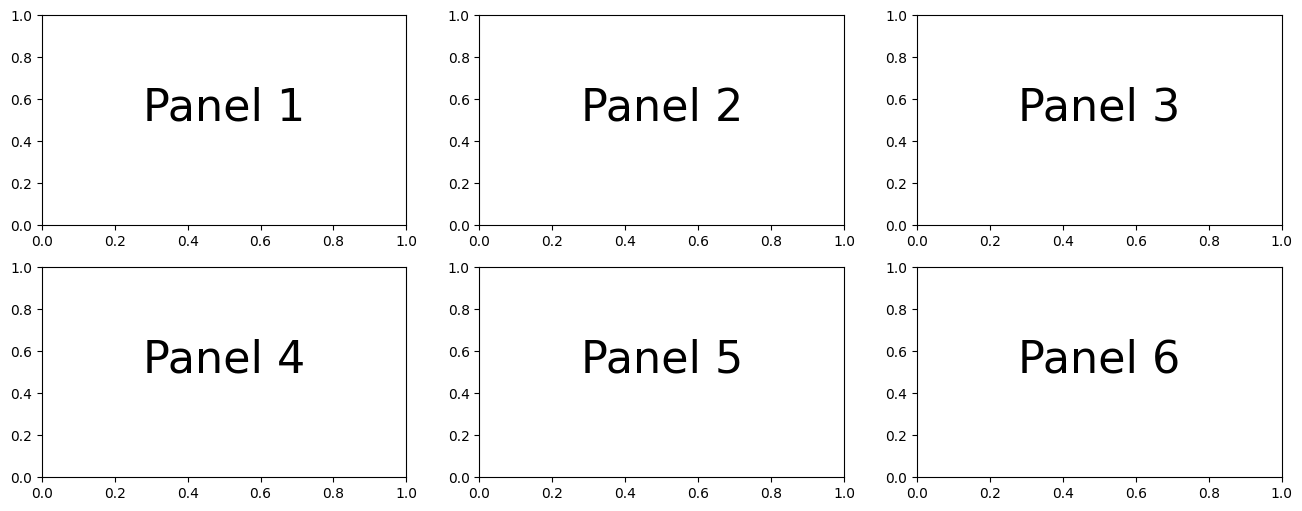

In [10]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(231)
ax.annotate("Panel 1", (0.5, 0.5), fontsize=32, ha="center")

ax = fig.add_subplot(232)
ax.annotate("Panel 2", (0.5, 0.5), fontsize=32, ha="center")

ax = fig.add_subplot(233)
ax.annotate("Panel 3", (0.5, 0.5), fontsize=32, ha="center")

ax = fig.add_subplot(234)
ax.annotate("Panel 4", (0.5, 0.5), fontsize=32, ha="center")

ax = fig.add_subplot(235)
ax.annotate("Panel 5", (0.5, 0.5), fontsize=32, ha="center")

ax = fig.add_subplot(236)
ax.annotate("Panel 6", (0.5, 0.5), fontsize=32, ha="center");

A second method is by using the `plt.subplots` function.

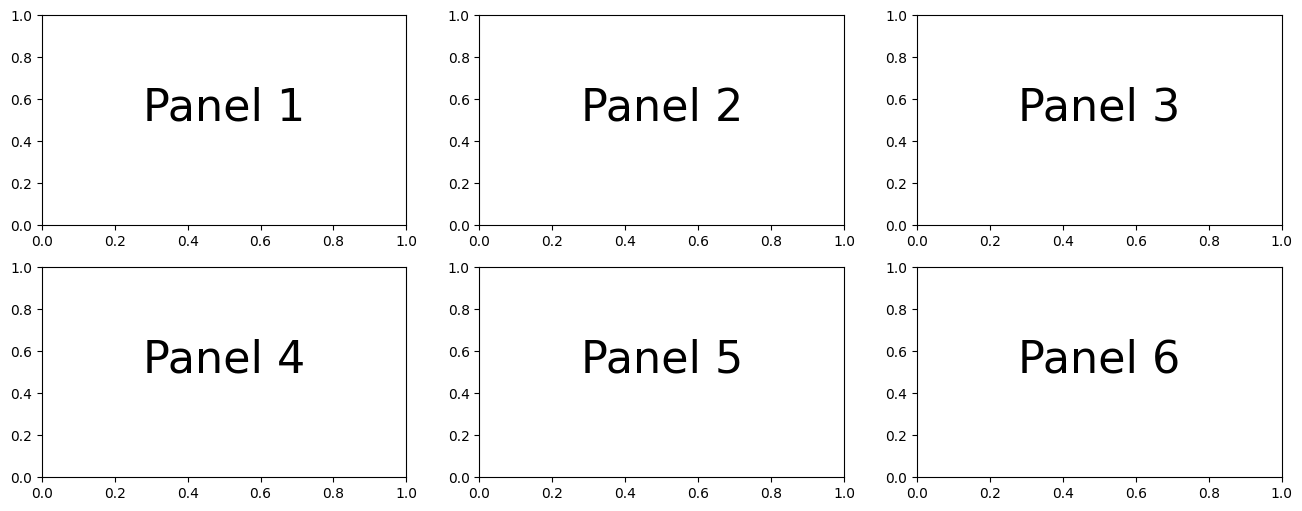

In [11]:
fig, axarr = plt.subplots(2, 3, figsize=(16, 6))
axarr[0, 0].annotate("Panel 1", (0.5, 0.5), fontsize=32, ha="center")
axarr[0, 1].annotate("Panel 2", (0.5, 0.5), fontsize=32, ha="center")
axarr[0, 2].annotate("Panel 3", (0.5, 0.5), fontsize=32, ha="center")
axarr[1, 0].annotate("Panel 4", (0.5, 0.5), fontsize=32, ha="center")
axarr[1, 1].annotate("Panel 5", (0.5, 0.5), fontsize=32, ha="center")
axarr[1, 2].annotate("Panel 6", (0.5, 0.5), fontsize=32, ha="center");

Finally, the third option is by using the `add_gridspec`-function of the `Figure` object. This instantiates a grid in which you can allocate any cell to a particular panel. 

Text(0.5, 0.5, 'Panel 6')

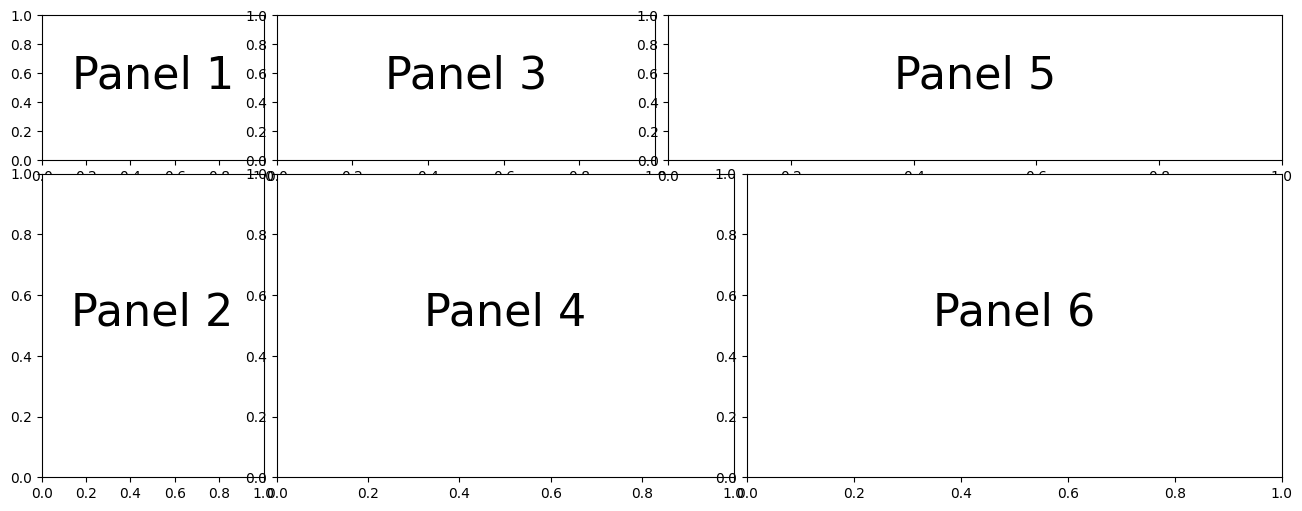

In [12]:
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(6, 16)
ax = fig.add_subplot(gs[:2, :3]); ax.annotate("Panel 1", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[2:, :3]); ax.annotate("Panel 2", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[:2, 3:8]); ax.annotate("Panel 3", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[2:, 3:9]); ax.annotate("Panel 4", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[:2, 8:]); ax.annotate("Panel 5", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[2:, 9:]); ax.annotate("Panel 6", (0.5, 0.5), fontsize=32, ha="center")

As the labels of the panels overlap in this figure, it is not the best visualization. A potential fix for this is to run `fig.tight_layout()` at the end of the figure, which will force the panels to slightly shrink to allow some space for the ticklabels. Note that this will not always help and you might have to tweak the size of the array in which you place your panels to get the desired result.

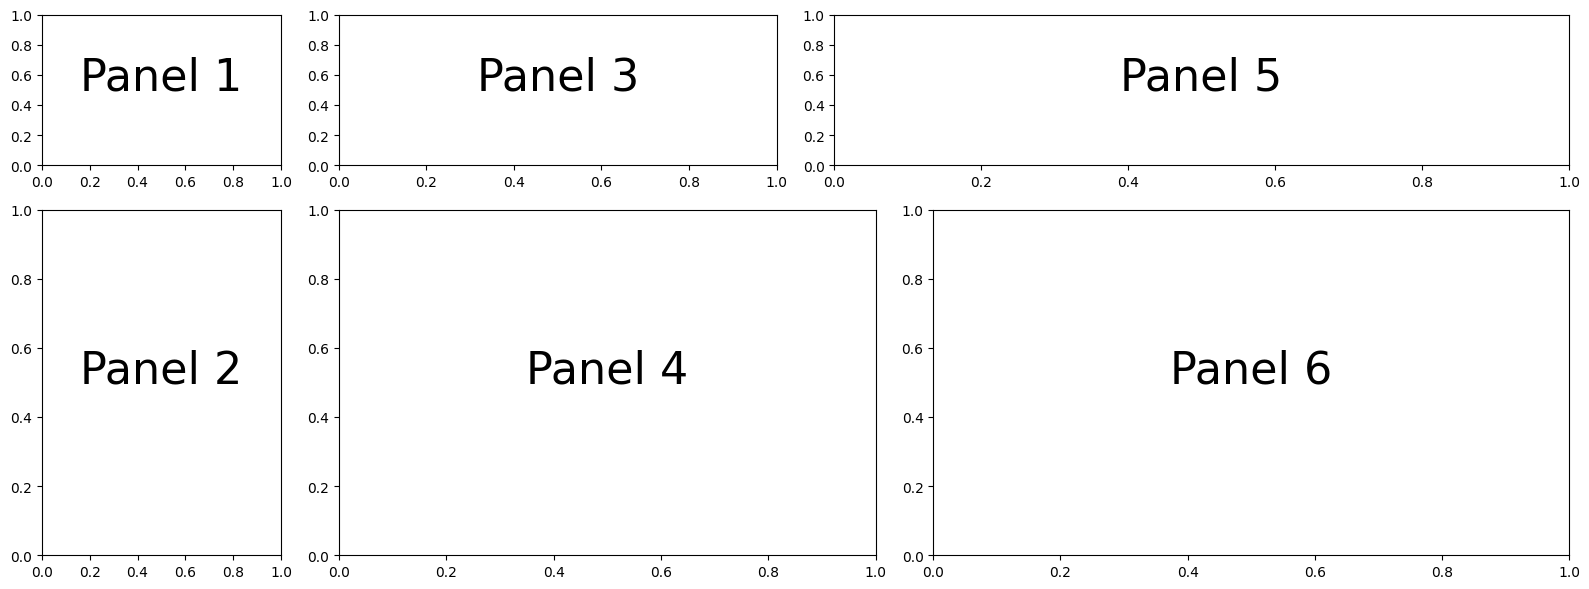

In [13]:
fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(6, 16)
ax = fig.add_subplot(gs[:2, :3]); ax.annotate("Panel 1", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[2:, :3]); ax.annotate("Panel 2", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[:2, 3:8]); ax.annotate("Panel 3", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[2:, 3:9]); ax.annotate("Panel 4", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[:2, 8:]); ax.annotate("Panel 5", (0.5, 0.5), fontsize=32, ha="center")
ax = fig.add_subplot(gs[2:, 9:]); ax.annotate("Panel 6", (0.5, 0.5), fontsize=32, ha="center")
fig.tight_layout()

## Exercises

1. Construct an additional column for the students dataframe that assigns students to different categories based on their average grade. Use the following categories:

<center>"$<6$", "$6-7$" , "$7-8$", "$8-9$", "$>9$".</center>

In [14]:
# SOLUTION GOES HERE

2. Use a list comprehension to select all course names that include `"ATE"` or  `"DSE"` in them.

In [15]:
# SOLUTION GOES HERE

3. Determine which courses have the highest and the lowest average grade

In [16]:
# SOLUTION GOES HERE

4. Visualize the grade distribution for the two courses from the previous exercise, by showing all observations per category that you created in exercise one.

In [17]:
# SOLUTION GOES HERE

5. Make a figure in which you display all dimensions of the penguin bill, stratified by species.

In [18]:
# SOLUTION GOES HERE

6. Calculate the mean absolute deviation for the bill length for each penguin species

In [19]:
# SOLUTION GOES HERE

7. Plot the previously calculated mean absolute deviation for the bill length for each penguin species

In [20]:
# SOLUTION GOES HERE